## Step:1 Import Library 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  ##StandardScaler removes the mean and scales each feature/variable to unit variance. to
                                                  ## used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

## Step:2 Read DataSet

In [2]:
df = pd.read_csv('C:\\Users\\91704\\OneDrive\\Desktop\\Kidney-disease-prediction-data-science\\Kidney.csv')
data = df
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 25)

In [4]:
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [6]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [7]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### Correlation matrix & Matrix Visualisation

In [8]:
df.corr()

C:\Users\91704\AppData\Local\Temp\ipykernel_15796\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


In [9]:
# Let's find out how many of each class are
df['class'].value_counts()
# from below output we ca draw our inference that this is close to "imbalanced dataset"

ckd       250
notckd    150
Name: class, dtype: int64

In [10]:
#Representation of Target variable in Percentage

countNoDisease = len(df[df['class'] == 0])
countHaveDisease = len(df[df['class'] == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df['class']))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df['class']))*100)))

Percentage of Patients Haven't Heart Disease: 0.00%
Percentage of Patients Have Heart Disease: 0.00%


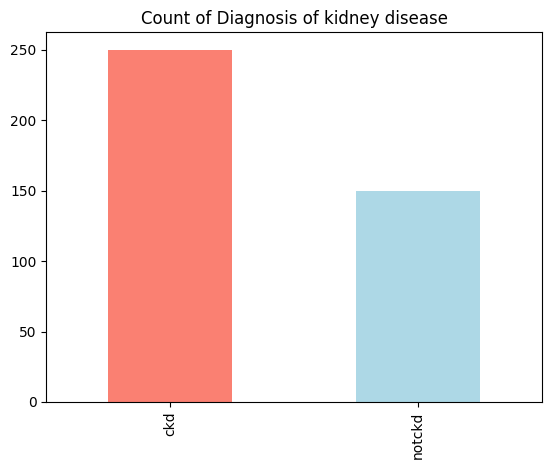

In [11]:
#Understanding the balancing of the data visually

df['class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease");


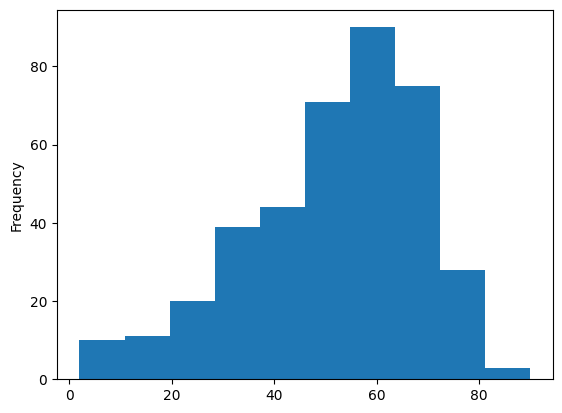

In [12]:
#Check the distribution of the age column with a histogram
df['age'].plot(kind='hist');

Inference: Here any features which ae not touching the 400 mark at the top are having null values.


C:\Users\91704\AppData\Local\Temp\ipykernel_15796\3323841862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(data['bp'])


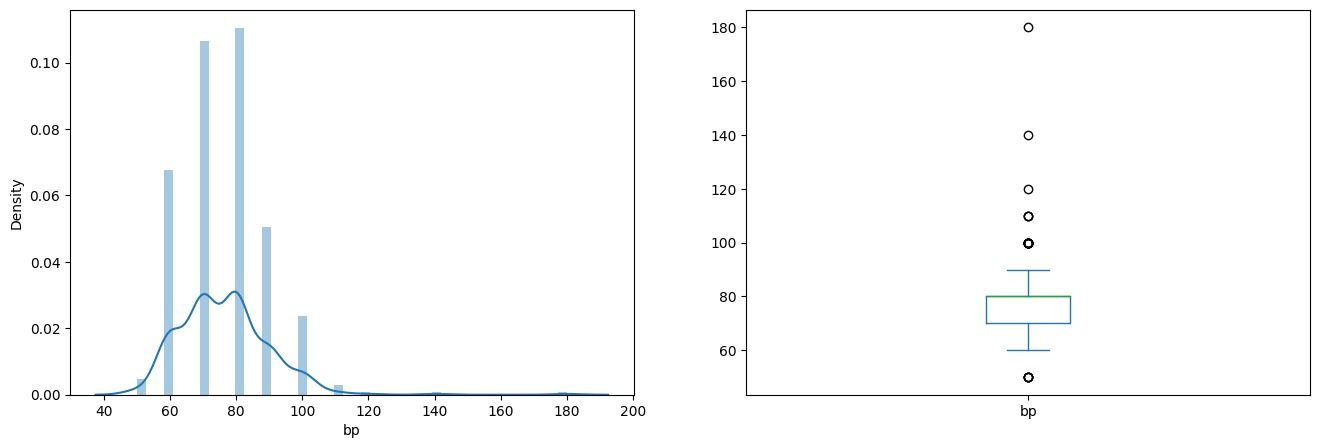

In [13]:
plt.subplot(121), sns.distplot(data['bp'])
plt.subplot(122), data['bp'].plot.box(figsize=(16,5))
plt.show()

In [14]:
data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})

In [15]:
data['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

<AxesSubplot: >

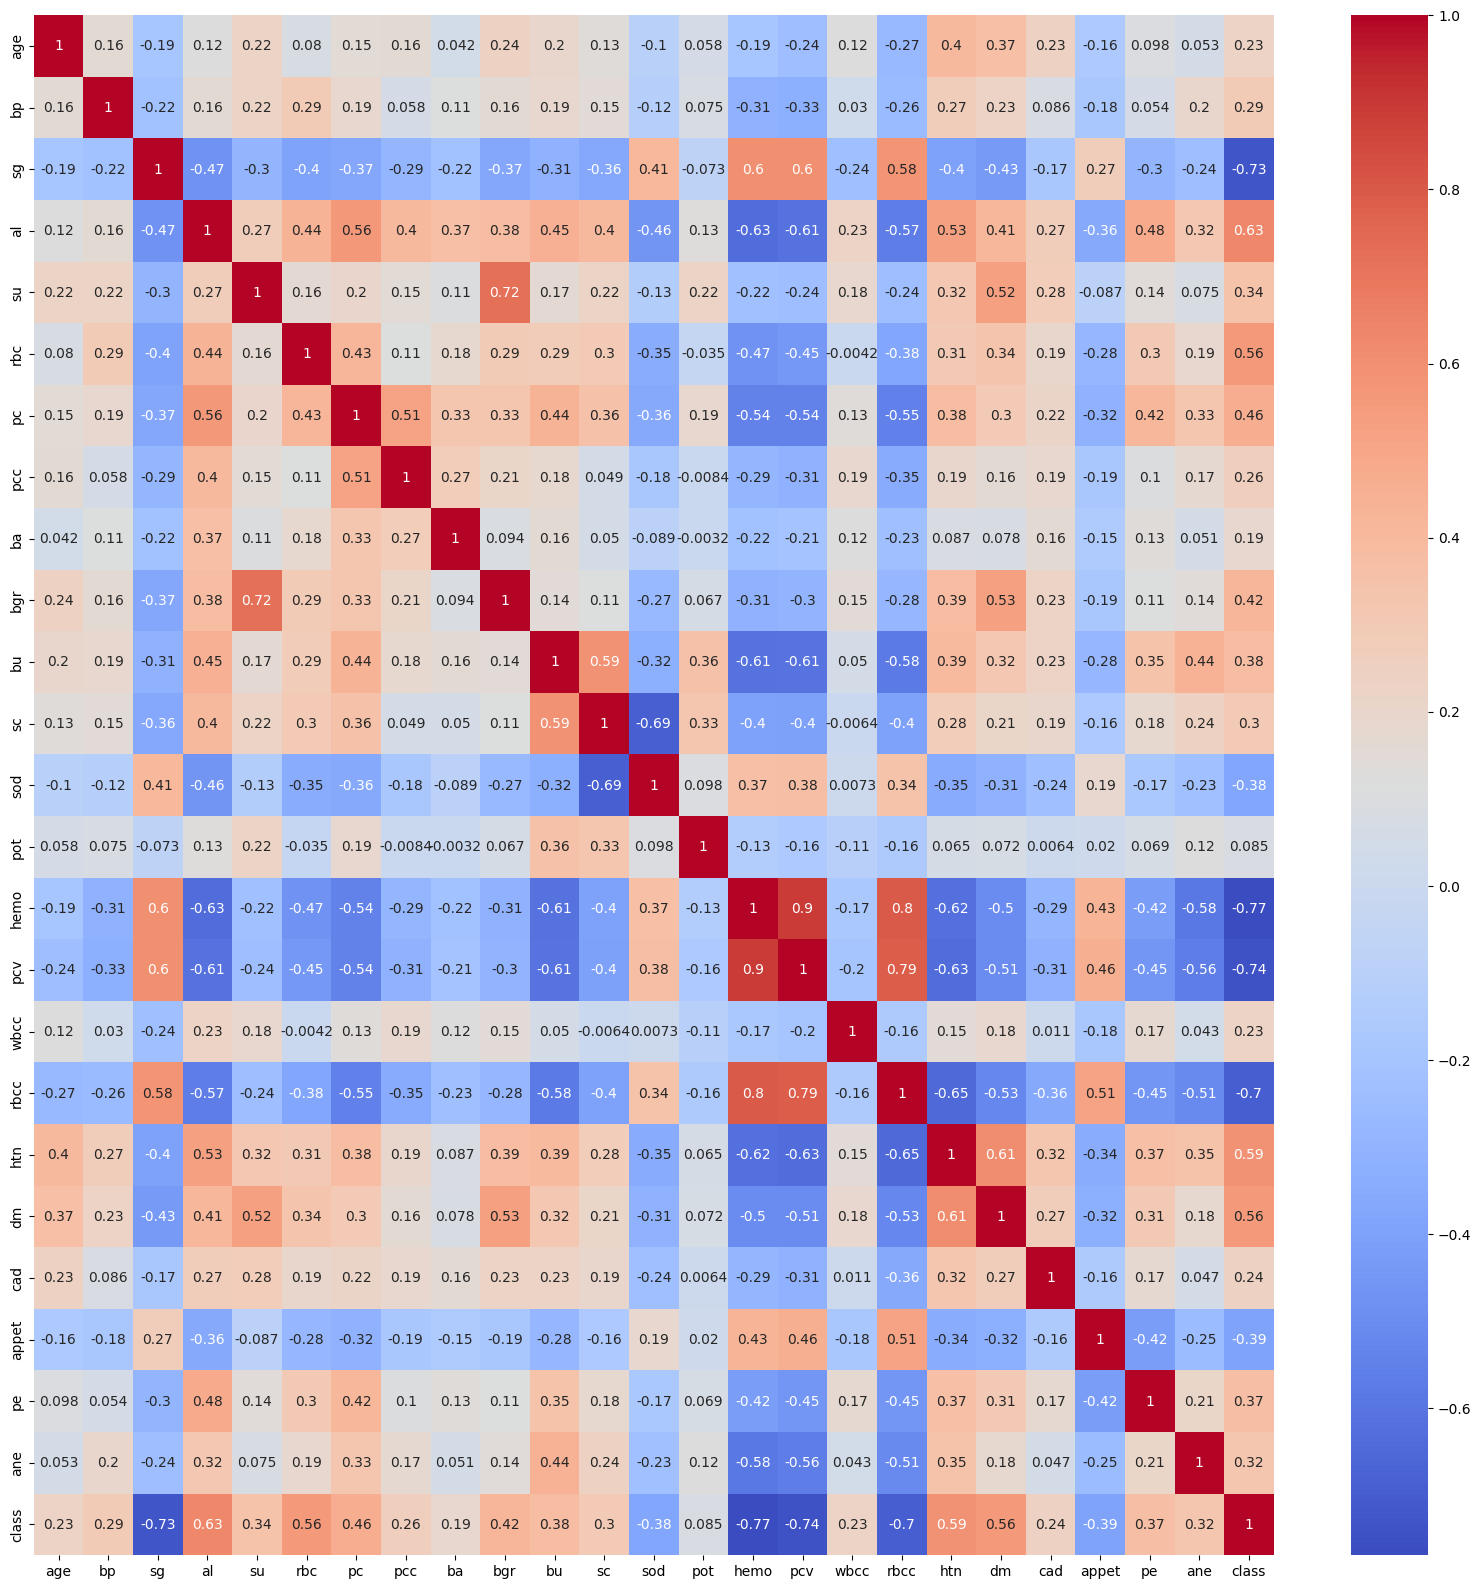

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row 

In [17]:
data.shape

(400, 25)

In [18]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [19]:
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [20]:
data.shape[0], data.dropna().shape[0]

(400, 158)

In [21]:
data.dropna(inplace=True)

In [22]:
data.shape

(158, 25)

## Modeling

##  Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logreg = LogisticRegression()

In [25]:
X = data.iloc[:,:-1]
y = data['class']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

In [28]:
logreg.fit(X_train,y_train)

c:\Users\91704\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#Training score
logreg.score(X_train,y_train)

1.0

In [30]:
#Testing accuracy
logreg.score(X_test,y_test)

1.0

In [31]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

In [33]:
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))
print('Test Accuracy: ', confusion_matrix(y_test, test_pred))
print('Test Accuracy: ', classification_report(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0
Test Accuracy:  [[29  0]
 [ 0 11]]
Test Accuracy:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### The cell below shows the coefficients for each variable.


In [34]:
pd.DataFrame(logreg.coef_, columns=X.columns)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0.205984,-0.101289,0.003483,0.313817,0.008345,0.00396,0.098362,0.013022,0.015051,0.223814,...,-0.22417,-0.747361,0.000785,-0.088831,0.090232,0.089234,0.001388,0.001356,0.00685,0.013513


### Confusion Matrix

In [35]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """This function will be heloing in plotting the confusion matrix by using seaborn """
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    


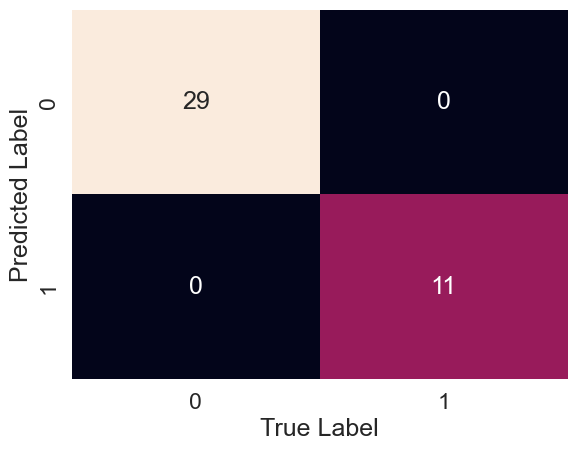

In [36]:
log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


### K-Nearest Neighbors Classifier

It is a good practice to first balance the class well before using the KNN, as we know that in the case of unbalanced classes KNN does'nt performs well.

In [38]:
df["class"].value_counts()

0    115
1     43
Name: class, dtype: int64

In [39]:
balanced_df = pd.concat([df[df["class"] == 0], df[df["class"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)

In [40]:
balanced_df["class"].value_counts()

0    115
1    115
Name: class, dtype: int64

In [41]:
X = balanced_df.drop("class", axis=1)
y = balanced_df["class"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [43]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()


model = knn.fit(X_train,y_train)

preds = model.predict(X_test)
print(f'Predicted_y { preds[:10]} Actual_y { y_test.values[:10]}')

accuracy_score(y_test, preds)

Predicted_y [1 0 0 1 0 1 0 1 1 1] Actual_y [1 0 0 1 0 1 0 1 1 1]


1.0

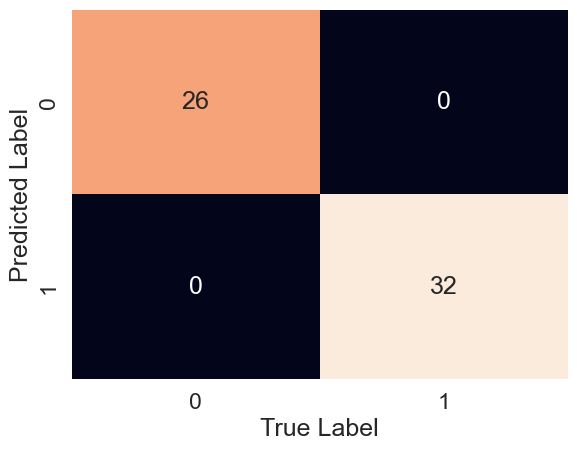

In [46]:
knn_pred = model.predict(X_test)
plot_conf_mat(y_test, knn_pred)

In [47]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 26
False Pos: 0
False Neg: 0
True Pos: 32


In [48]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable

feature_dict=dict(zip(df.columns,list(logreg.coef_[0])))
feature_dict
#This is a type of Model driven Exploratory data analysis

{'age': 0.2059840182260687,
 'bp': -0.10128896824135904,
 'sg': 0.003482691623799088,
 'al': 0.3138169341461734,
 'su': 0.00834502958533336,
 'rbc': 0.0039601855026949635,
 'pc': 0.09836168626770891,
 'pcc': 0.013021541826630416,
 'ba': 0.015051091247395018,
 'bgr': 0.22381360764312988,
 'bu': 0.23807788393214502,
 'sc': 0.11865672116415196,
 'sod': -0.12628539658257495,
 'pot': 0.036724021496680935,
 'hemo': -0.2241699380240774,
 'pcv': -0.7473608347420185,
 'wbcc': 0.0007851922008057635,
 'rbcc': -0.08883144909352307,
 'htn': 0.09023197095561493,
 'dm': 0.08923425046297744,
 'cad': 0.001387781198437121,
 'appet': 0.0013561881019386927,
 'pe': 0.006849832721332024,
 'ane': 0.013513032625464159}

<AxesSubplot: title={'center': 'Feature Importance'}, ylabel='Frequency'>

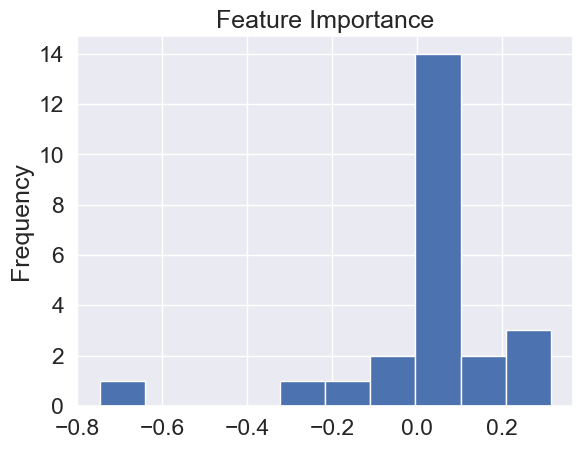

In [49]:
#Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="hist",legend=False,title="Feature Importance")

<AxesSubplot: title={'center': 'Feature Importance'}>

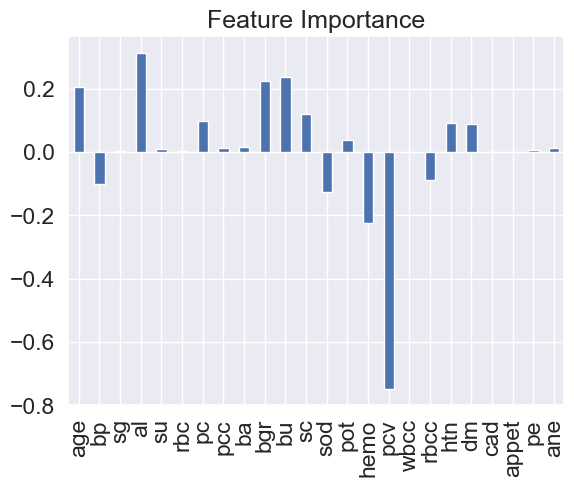

In [50]:
#Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

## Saving model

In [51]:
import pickle
 
# Now with the help of pickle model we will be saving the trained model
saved_model = pickle.dumps(logreg)
 
# Load the pickled model
logreg_from_pickle = pickle.loads(saved_model)
 
# Now here we will load the model
logreg_from_pickle.predict(X_test)

c:\Users\91704\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [52]:
# check prediction
# lr.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]) # similar

logreg.predict(X_test)

c:\Users\91704\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [53]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1


In [54]:
# putting datapoints in the model it will either return 0 or 1 i.e. person having chronic kideny disease or not
logreg.predict([[48,80,1.02,1,0,1,0,1,1,2,0,0,1,1,0,1,1,2,0,0,1,0,1,2]]) 

c:\Users\91704\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)